### Import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import random
import os
from tqdm import tqdm

from PIL import Image

In [2]:
BASE_PATH = "/kaggle/input/grand-xray-slam-division-a/"
TRAIN_IMG_PATH = os.path.join(BASE_PATH, "train1/")
TEST_IMG_PATH = os.path.join(BASE_PATH, "test1/")
TRAIN_CSV = os.path.join(BASE_PATH, "train1.csv")
SAMPLE_SUB_CSV = os.path.join(BASE_PATH, "sample_submission_1.csv")

TARGET_LABELS = [
    'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
    'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
    'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other',
    'Pneumonia', 'Pneumothorax', 'Support Devices'
]

### EDA

In [3]:
train_df = pd.read_csv(TRAIN_CSV)
print("Kolon isimleri:", train_df.columns.tolist())
print("\nİlk 5 satır:")
print(train_df.head())

Kolon isimleri: ['Image_name', 'Patient_ID', 'Study', 'Sex', 'Age', 'ViewCategory', 'ViewPosition', 'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion', 'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other', 'Pneumonia', 'Pneumothorax', 'Support Devices']

İlk 5 satır:
             Image_name  Patient_ID  Study     Sex   Age ViewCategory  \
0  00000001_001_001.jpg           1      1  Female  68.0      Frontal   
1  00000009_001_001.jpg           9      1    Male  76.0      Frontal   
2  00000009_001_002.jpg           9      1    Male  76.0      Lateral   
3  00000011_013_001.jpg          11     13  Female  22.0      Frontal   
4  00000011_013_002.jpg          11     13  Female  22.0      Lateral   

  ViewPosition  Atelectasis  Cardiomegaly  Consolidation  ...  \
0           AP            0             0              0  ...   
1           PA            0             1              0  ...   
2      Lateral         

In [4]:
TARGET_LABELS = [
    'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
    'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
    'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other',
    'Pneumonia', 'Pneumothorax', 'Support Devices'
]

In [9]:
print("Toplam görüntü:", len(train_df))
print("Eksik değerler:\n", train_df.isnull().sum())
print("Etiket başına pozitif örnek sayısı:\n", train_df[TARGET_LABELS].sum())
print("Bir görüntüde ortalama pozitif label sayısı:", train_df[TARGET_LABELS].sum(axis=1).mean())

Toplam görüntü: 107374
Eksik değerler:
 Image_name                        0
Patient_ID                        0
Study                             0
Sex                           14766
Age                           14766
ViewCategory                      0
ViewPosition                      0
Atelectasis                       0
Cardiomegaly                      0
Consolidation                     0
Edema                             0
Enlarged Cardiomediastinum        0
Fracture                          0
Lung Lesion                       0
Lung Opacity                      0
No Finding                        0
Pleural Effusion                  0
Pleural Other                     0
Pneumonia                         0
Pneumothorax                      0
Support Devices                   0
dtype: int64
Etiket başına pozitif örnek sayısı:
 Atelectasis                   38834
Cardiomegaly                  35000
Consolidation                 29384
Edema                         26671
Enlarged C

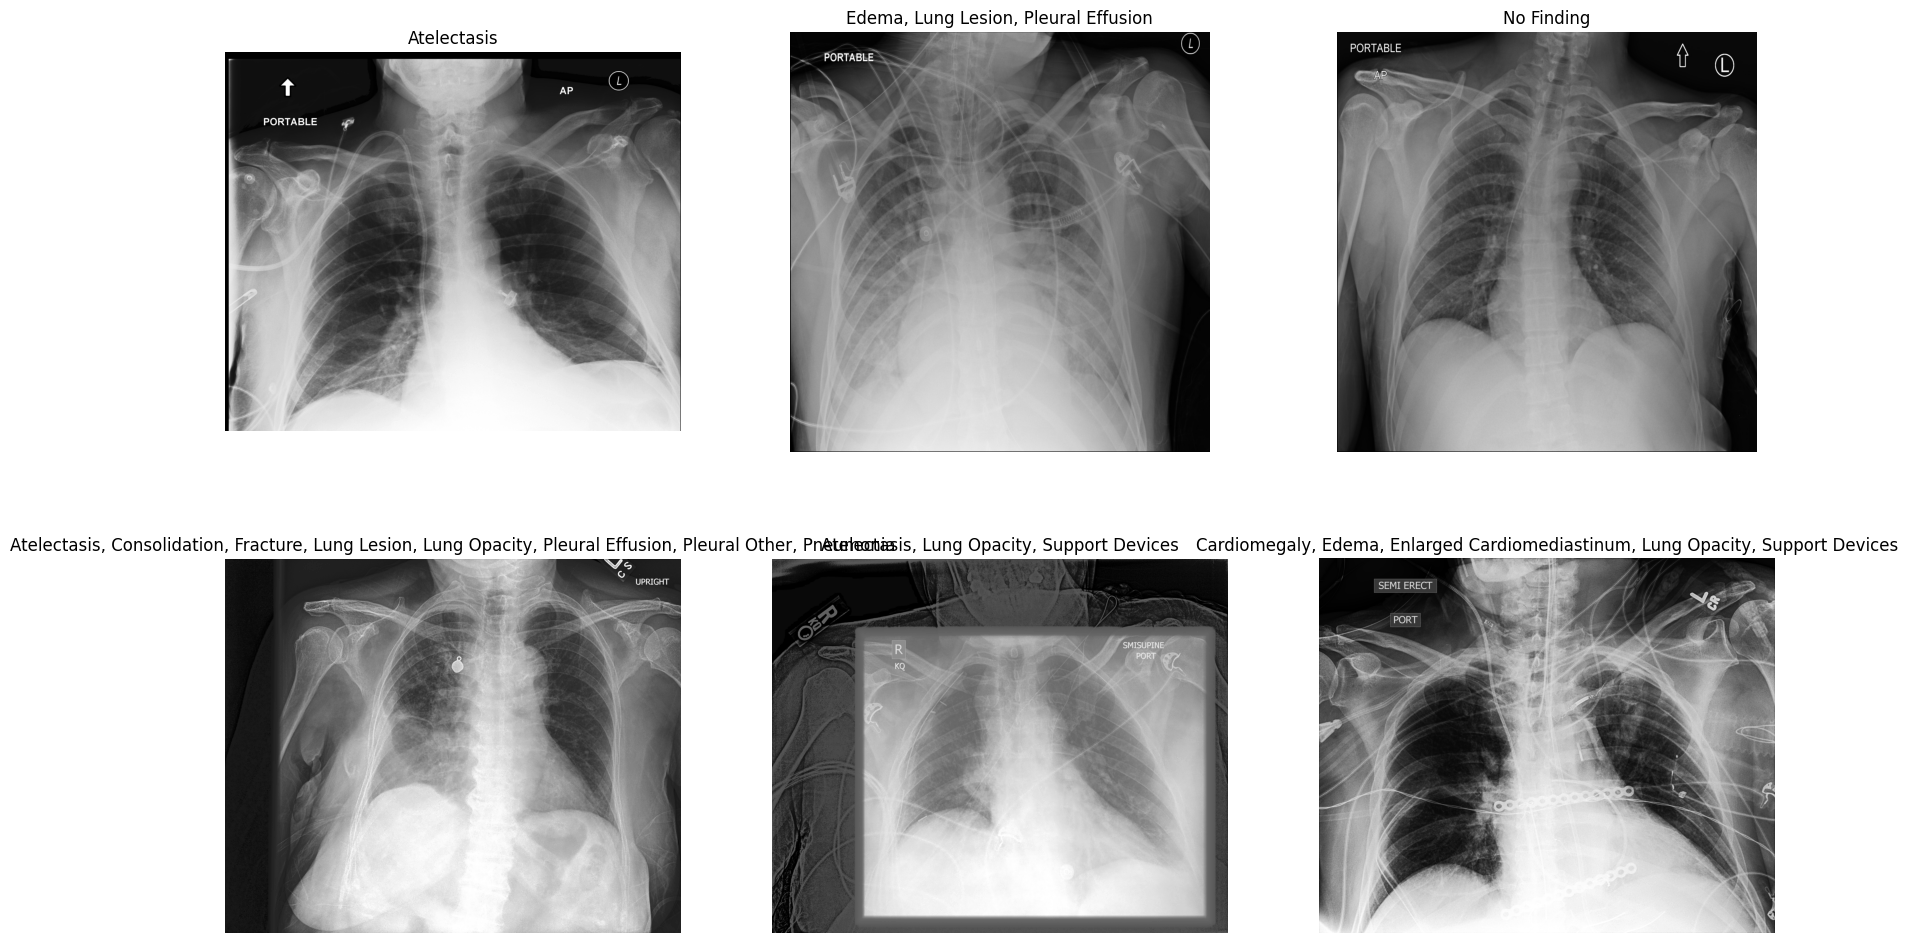

In [7]:
def show_samples(df, img_dir, n=6):
    sample_df = df.sample(n)
    plt.figure(figsize=(20, 12))
    for i, (_, row) in enumerate(sample_df.iterrows()):
        img_path = os.path.join(img_dir, row['Image_name'])
        img = Image.open(img_path)
        labels = [l for l in TARGET_LABELS if row[l]==1]
        
        plt.subplot(2, 3, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(", ".join(labels) if labels else "No Finding")
        plt.axis("off")
    plt.show()

show_samples(train_df, TRAIN_IMG_PATH, n=6)

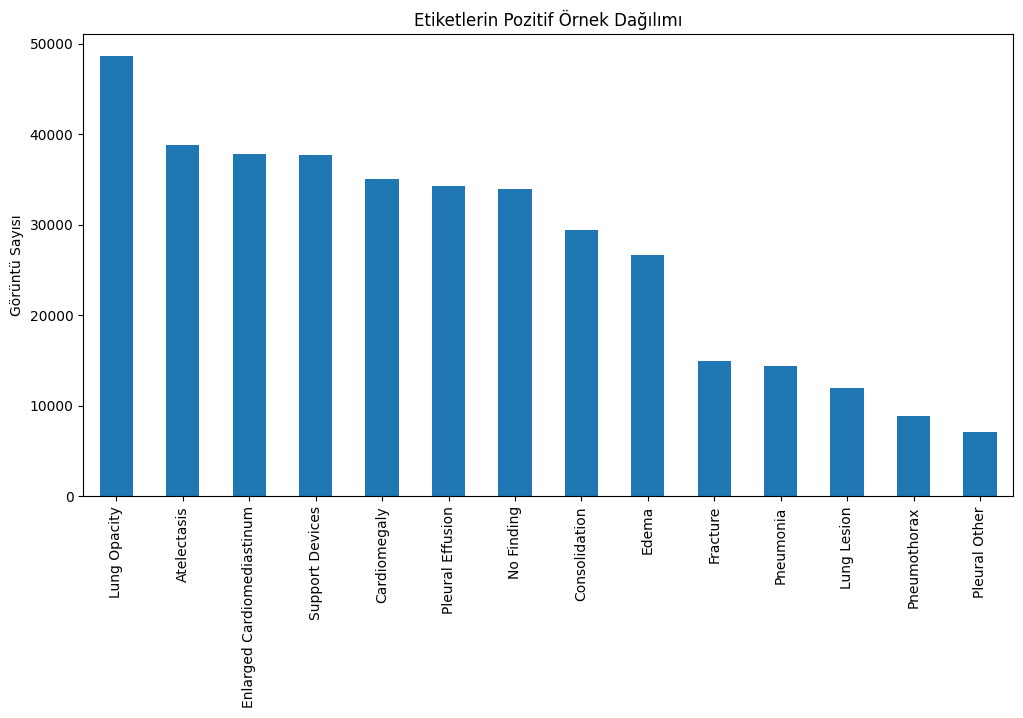

In [8]:
label_counts = train_df[TARGET_LABELS].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
label_counts.plot(kind="bar")
plt.title("Etiketlerin Pozitif Örnek Dağılımı")
plt.ylabel("Görüntü Sayısı")
plt.show()

Benzersiz hasta sayısı: 32076
Ortalama görüntü sayısı / hasta: 3.347487217857588


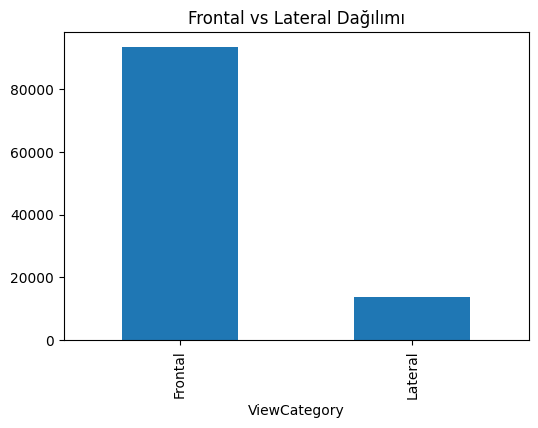

In [9]:
print("Benzersiz hasta sayısı:", train_df['Patient_ID'].nunique())
print("Ortalama görüntü sayısı / hasta:", train_df.groupby('Patient_ID')['Image_name'].count().mean())

plt.figure(figsize=(6,4))
train_df['ViewCategory'].value_counts().plot(kind='bar')
plt.title("Frontal vs Lateral Dağılımı")
plt.show()

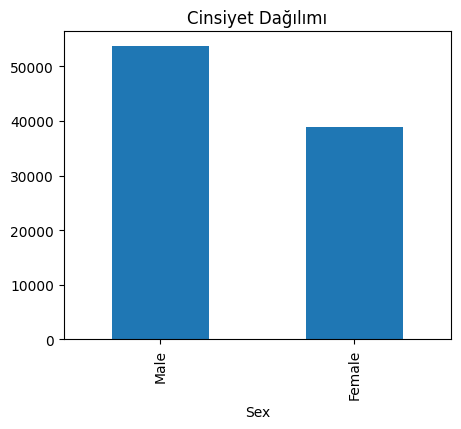

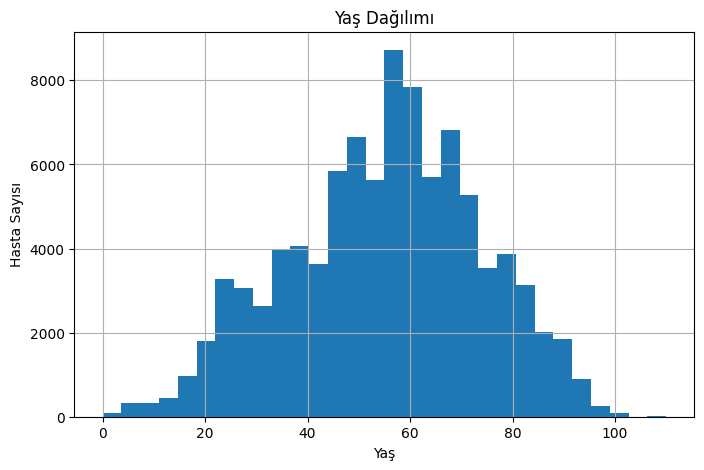

In [10]:
plt.figure(figsize=(5,4))
train_df['Sex'].value_counts().plot(kind="bar")
plt.title("Cinsiyet Dağılımı")
plt.show()

plt.figure(figsize=(8,5))
train_df['Age'].hist(bins=30)
plt.title("Yaş Dağılımı")
plt.xlabel("Yaş")
plt.ylabel("Hasta Sayısı")
plt.show()

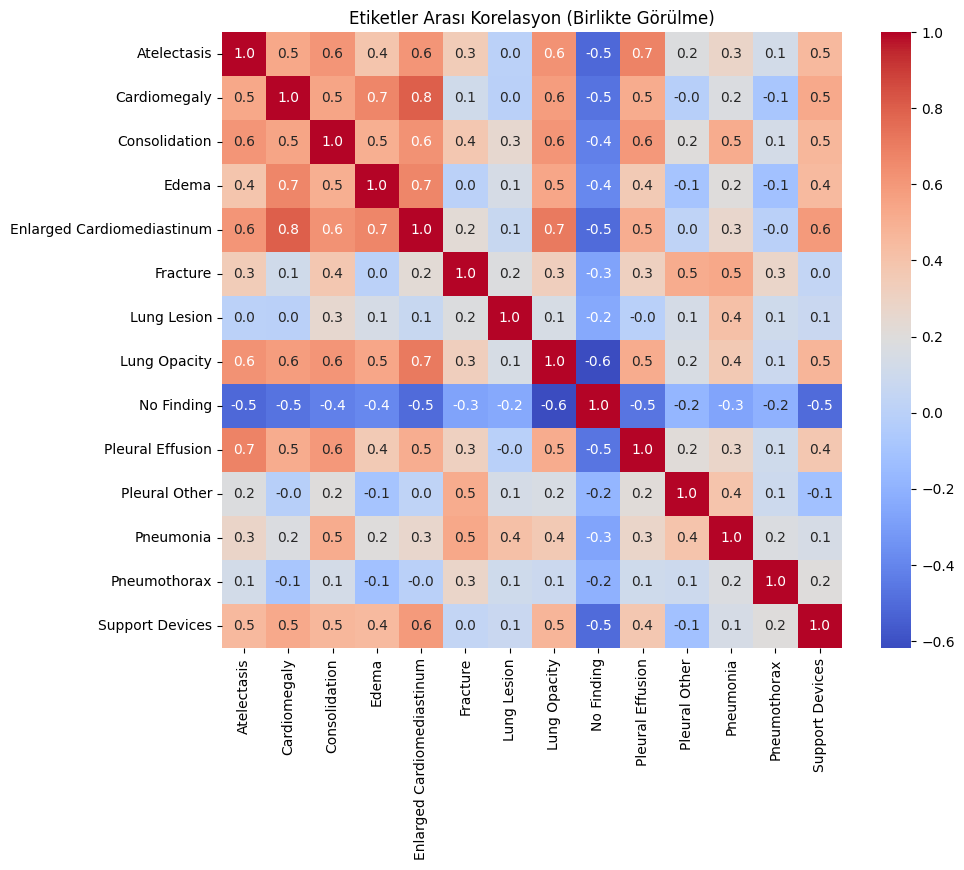

In [11]:
import seaborn as sns

corr = train_df[TARGET_LABELS].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm",fmt='0.01f')
plt.title("Etiketler Arası Korelasyon (Birlikte Görülme)")
plt.show()

100%|██████████| 1000/1000 [00:09<00:00, 111.08it/s]


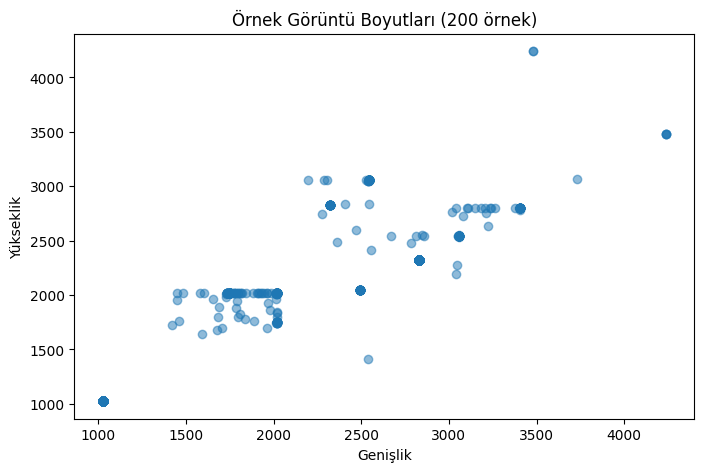

In [12]:


sizes = []
for fname in tqdm(train_df['Image_name'].sample(1000)):  # çok büyük dataset → örnekle
    img = Image.open(os.path.join(TRAIN_IMG_PATH, fname))
    sizes.append(img.size)

widths, heights = zip(*sizes)
plt.figure(figsize=(8,5))
plt.scatter(widths, heights, alpha=0.5)
plt.xlabel("Genişlik")
plt.ylabel("Yükseklik")
plt.title("Örnek Görüntü Boyutları (200 örnek)")
plt.show()

Toplam hasta sayısı: 32076
Bir hastaya düşen ortalama görüntü: 3.347487217857588
Bir hastaya düşen en fazla görüntü: 157


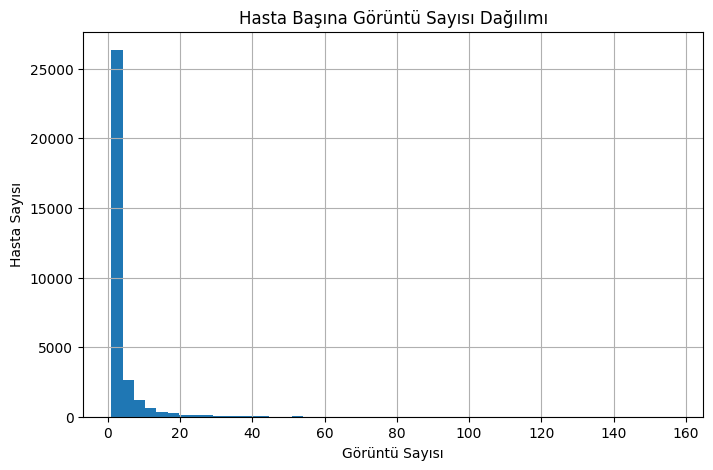

In [13]:
patient_counts = train_df.groupby("Patient_ID")["Image_name"].count()

print("Toplam hasta sayısı:", train_df["Patient_ID"].nunique())
print("Bir hastaya düşen ortalama görüntü:", patient_counts.mean())
print("Bir hastaya düşen en fazla görüntü:", patient_counts.max())

plt.figure(figsize=(8,5))
patient_counts.hist(bins=50)
plt.title("Hasta Başına Görüntü Sayısı Dağılımı")
plt.xlabel("Görüntü Sayısı")
plt.ylabel("Hasta Sayısı")
plt.show()

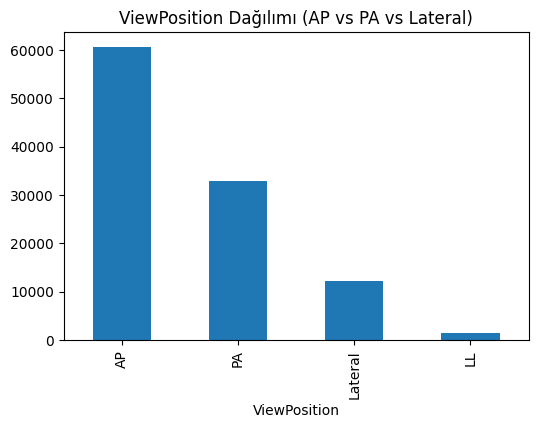

In [14]:
plt.figure(figsize=(6,4))
train_df["ViewPosition"].value_counts().plot(kind="bar")
plt.title("ViewPosition Dağılımı (AP vs PA vs Lateral)")
plt.show()

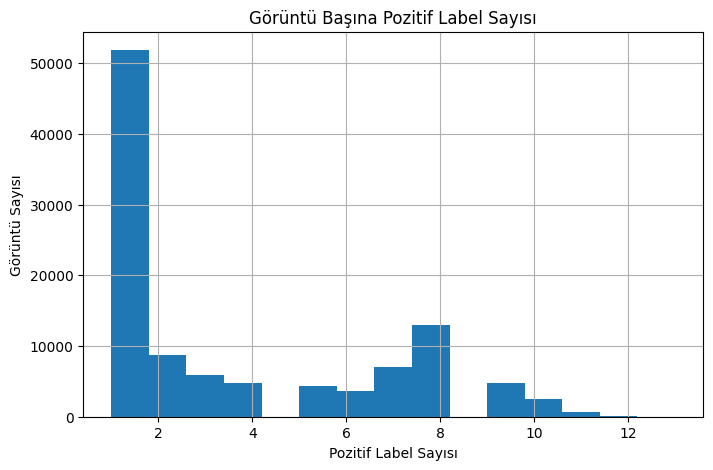

Tek label'lı görüntü sayısı: 51840
2 label'lı görüntü sayısı: 8775
3+ label'lı görüntü sayısı: 46759


In [15]:
num_labels = train_df[TARGET_LABELS].sum(axis=1)

plt.figure(figsize=(8,5))
num_labels.hist(bins=15)
plt.title("Görüntü Başına Pozitif Label Sayısı")
plt.xlabel("Pozitif Label Sayısı")
plt.ylabel("Görüntü Sayısı")
plt.show()

print("Tek label'lı görüntü sayısı:", (num_labels==1).sum())
print("2 label'lı görüntü sayısı:", (num_labels==2).sum())
print("3+ label'lı görüntü sayısı:", (num_labels>=3).sum())

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


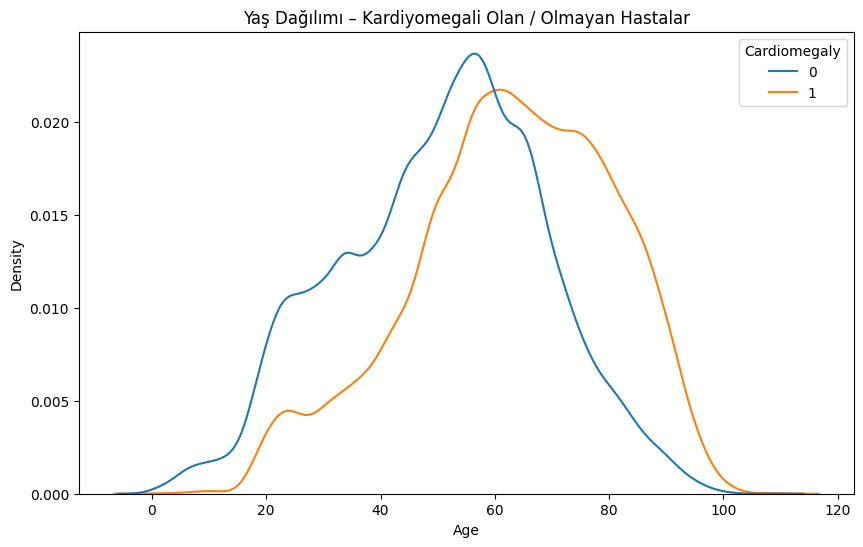

In [16]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=train_df, x="Age", hue="Cardiomegaly", common_norm=False)
plt.title("Yaş Dağılımı – Kardiyomegali Olan / Olmayan Hastalar")
plt.show()

100%|██████████| 500/500 [00:04<00:00, 124.40it/s]


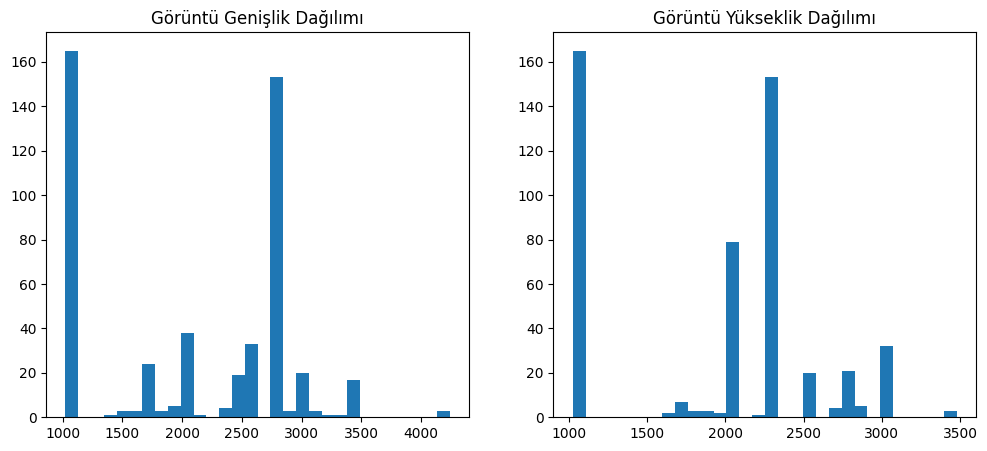

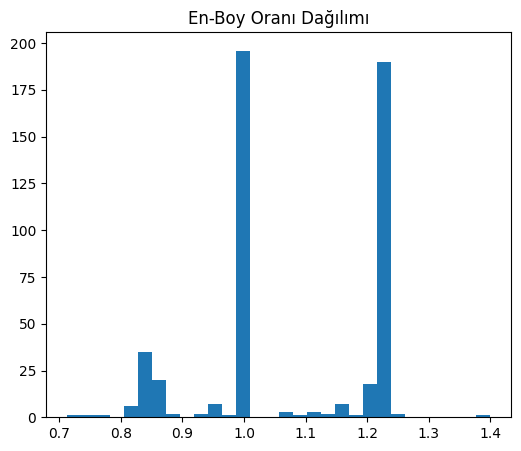

In [17]:
from tqdm import tqdm
sizes = []
for fname in tqdm(train_df["Image_name"].sample(500)):  # 500 örnek, çok büyük olmasın
    img = Image.open(os.path.join(TRAIN_IMG_PATH, fname))
    sizes.append(img.size)

widths, heights = zip(*sizes)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(widths, bins=30)
plt.title("Görüntü Genişlik Dağılımı")

plt.subplot(1,2,2)
plt.hist(heights, bins=30)
plt.title("Görüntü Yükseklik Dağılımı")
plt.show()

plt.figure(figsize=(6,5))
plt.hist(np.array(widths)/np.array(heights), bins=30)
plt.title("En-Boy Oranı Dağılımı")
plt.show()

In [10]:
TARGET_LABELS = [
    'Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
    'Enlarged Cardiomediastinum', 'Fracture', 'Lung Lesion',
    'Lung Opacity', 'No Finding', 'Pleural Effusion', 'Pleural Other',
    'Pneumonia', 'Pneumothorax', 'Support Devices'
]

### Model

In [9]:
!pip -q install iterative-stratification albumentations transformers timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.8 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.5 MB/s eta 0:00:00:00:0100:01


In [4]:
!pip install --upgrade iterative-stratification

In [14]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121


Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.5/780.5 MB 2.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 78.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 84.8 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 81.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 95.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 14.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 31.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.

In [5]:
import os, math, gc, cv2, numpy as np, pandas as pd
from tqdm.auto import tqdm
import torch, torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import roc_auc_score
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
import albumentations as A
from albumentations.pytorch import ToTensorV2


In [16]:
pip install -U transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 102.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 563.4/563.4 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 85.0 MB/s eta 0:00:00:00:01
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.33.1
    Uninstalling huggingface-hub-0.33.1:
      Successfully uninstalled huggingface-hub-0.33.1
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.2
    Uninstalling tokenizers-0.21.2:
      Successfully uninstalled tokenizers-0.21.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.4
    Uninstalling transformers-4.52.4:
      Successfully uninstalled transformers-4.52.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is t

In [6]:
from transformers import SwinModel

2025-09-19 07:31:39.572471: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758267099.766467      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758267099.821888      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:

SEED = 42
def set_seed(seed=SEED):
    import random
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
set_seed()

DATA_DIR = "/kaggle/input/grand-xray-slam-division-a"
TRAIN_CSV = os.path.join(DATA_DIR, "train1.csv")
TRAIN_DIR = os.path.join(DATA_DIR, "train1")
TEST_DIR  = os.path.join(DATA_DIR, "test1")

TARGET_LABELS = [
    'Atelectasis','Cardiomegaly','Consolidation','Edema',
    'Enlarged Cardiomediastinum','Fracture','Lung Lesion',
    'Lung Opacity','No Finding','Pleural Effusion',
    'Pleural Other','Pneumonia','Pneumothorax','Support Devices'
]

IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 8
LR = 1e-4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE, "GPUs:", torch.cuda.device_count())

cuda GPUs: 1


In [9]:
df = pd.read_csv(TRAIN_CSV)
# Not: Age/Sex NaN'leri modellemeye dahil etmeyeceğimiz için burada bırakabiliriz; split mantığını bozmaz.

label_cols = TARGET_LABELS
keep_cols  = ['Image_name','Patient_ID'] + label_cols
df = df[keep_cols].copy()

# Hasta seviyesine topla (en az bir imajda pozitifse hasta-etiketi pozitif say)
patient_df = df.groupby('Patient_ID')[label_cols].max().reset_index()

msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
(train_idx, val_idx) = next(msss.split(patient_df['Patient_ID'], patient_df[label_cols]))

train_patients = patient_df.loc[train_idx, 'Patient_ID']
val_patients   = patient_df.loc[val_idx, 'Patient_ID']

train_df = df[df['Patient_ID'].isin(train_patients)].reset_index(drop=True)
val_df   = df[df['Patient_ID'].isin(val_patients)].reset_index(drop=True)

# sızıntı kontrolü
assert set(train_df.Patient_ID).isdisjoint(set(val_df.Patient_ID))

print("Train:", train_df.shape, "Val:", val_df.shape)
print("Train label prevalence:\n", train_df[label_cols].mean().round(4))
print("Val   label prevalence:\n", val_df[label_cols].mean().round(4))

Train: (85108, 16) Val: (22266, 16)
Train label prevalence:
 Atelectasis                   0.3606
Cardiomegaly                  0.3241
Consolidation                 0.2741
Edema                         0.2478
Enlarged Cardiomediastinum    0.3521
Fracture                      0.1408
Lung Lesion                   0.1117
Lung Opacity                  0.4518
No Finding                    0.3179
Pleural Effusion              0.3163
Pleural Other                 0.0661
Pneumonia                     0.1351
Pneumothorax                  0.0836
Support Devices               0.3513
dtype: float64
Val   label prevalence:
 Atelectasis                   0.3657
Cardiomegaly                  0.3332
Consolidation                 0.2722
Edema                         0.2506
Enlarged Cardiomediastinum    0.3544
Fracture                      0.1350
Lung Lesion                   0.1075
Lung Opacity                  0.4569
No Finding                    0.3098
Pleural Effusion              0.3289
Pleural Oth

In [10]:
def get_transforms(train=False):
    if train:
        return A.Compose([
            A.Resize(IMG_SIZE, IMG_SIZE),
            A.HorizontalFlip(p=0.5),
            A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.08, rotate_limit=7, p=0.5),
            A.RandomBrightnessContrast(0.15, 0.15, p=0.5),
            A.CLAHE(p=0.3),
            A.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
            ToTensorV2()
        ])
    else:
        return A.Compose([
            A.Resize(IMG_SIZE, IMG_SIZE),
            A.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
            ToTensorV2()
        ])

class CXRDataset(Dataset):
    def __init__(self, df, img_dir, labels, transforms=None, is_test=False):
        self.df, self.dir, self.labels = df, img_dir, labels
        self.transforms = transforms; self.is_test = is_test

    def __len__(self): return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        path = os.path.join(self.dir, row['Image_name'])
        img = cv2.imread(path); img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.transforms: img = self.transforms(image=img)['image']
        if self.is_test: return img
        y = torch.tensor(row[self.labels].values.astype(np.float32))
        return img, y

train_ds = CXRDataset(train_df, TRAIN_DIR, TARGET_LABELS, get_transforms(train=True))
val_ds   = CXRDataset(val_df,   TRAIN_DIR, TARGET_LABELS, get_transforms(train=False))
train_ld = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4, pin_memory=True)
val_ld   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [11]:
class SwinCNNHybrid(nn.Module):
    def __init__(self, num_labels=14, backbone="microsoft/swin-tiny-patch4-window7-224"):
        super().__init__()
        self.swin = SwinModel.from_pretrained(backbone)
        hidden = self.swin.config.hidden_size  # C

        # küçük CNN refinement head
        self.head = nn.Sequential(
            nn.Conv2d(hidden, 256, 3, padding=1), nn.BatchNorm2d(256), nn.GELU(),
            nn.Conv2d(256, 256, 3, padding=1),   nn.BatchNorm2d(256), nn.GELU(),
            nn.AdaptiveAvgPool2d((1,1)), nn.Flatten()
        )
        self.cls = nn.Linear(256, num_labels)

    def forward(self, x):
        out = self.swin(x).last_hidden_state  # [B, N, C]
        B, N, C = out.shape
        h = int(round(math.sqrt(N)))
        if h * h != N:  # güvenlik: kare değilse yakın kareye projeksiyon
            # örn. 14x14 -> 196 patch, genelde kare; değilse pad/crop edilebilir
            h = int(np.floor(np.sqrt(N)))
            out = out[:, :h*h, :]
        feat = out.transpose(1,2).reshape(B, C, h, h)  # [B, C, H, W]
        z = self.head(feat)                            # [B, 256]
        logits = self.cls(z)                           # [B, 14]
        return logits

In [32]:
model = SwinCNNHybrid(num_labels=len(TARGET_LABELS)).to(DEVICE)

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

In [33]:
import math
from sklearn.metrics import roc_auc_score

# Weighted BCE with Logits Loss (class imbalance için)
pos_weight = torch.tensor(
    [len(train_df) / (train_df[col].sum() + 1e-6) for col in TARGET_LABELS],
    dtype=torch.float32
).to(DEVICE)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)

# Optimizer & Scheduler
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode="max",   # AUC artışına göre LR azaltacak
    factor=0.2,
    patience=2,
    verbose=True
)


In [35]:
def evaluate(model, loader, criterion):
    model.eval()
    loss_sum, preds_list, labels_list = 0.0, [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss_sum += loss.item() * imgs.size(0)
            preds_list.append(torch.sigmoid(outputs).cpu())
            labels_list.append(labels.cpu())
    avg_loss = loss_sum / len(loader.dataset)
    preds = torch.cat(preds_list).numpy()
    labels = torch.cat(labels_list).numpy()
    macro_auc = roc_auc_score(labels, preds, average="macro")
    per_class_auc = {
        label: roc_auc_score(labels[:, i], preds[:, i])
        for i, label in enumerate(TARGET_LABELS)
        if len(np.unique(labels[:, i])) > 1  # tek sınıf varsa ROC hesaplanmaz
    }
    return avg_loss, macro_auc, per_class_auc


def train_model(model, train_loader, val_loader, epochs):
    best_auc = 0.0
    history = {"train_loss": [], "val_loss": [], "train_auc": [], "val_auc": []}

    for epoch in range(1, epochs+1):
        model.train()
        train_loss, preds_list, labels_list = 0.0, [], []

        for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{epochs} Training"):
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * imgs.size(0)
            preds_list.append(torch.sigmoid(outputs).detach().cpu())
            labels_list.append(labels.detach().cpu())

        train_loss /= len(train_loader.dataset)
        train_preds = torch.cat(preds_list).numpy()
        train_labels = torch.cat(labels_list).numpy()
        train_auc = roc_auc_score(train_labels, train_preds, average="macro")

        # --- Validation ---
        val_loss, val_auc, per_class_auc = evaluate(model, val_loader, criterion)

        # --- Logs ---
        print(f"\nEpoch {epoch}/{epochs}")
        print(f"Train Loss {train_loss:.4f} | Train AUC {train_auc:.4f}")
        print(f"Val   Loss {val_loss:.4f} | Val   AUC {val_auc:.4f}")
        print("Per-class AUCs:")
        for k,v in per_class_auc.items():
            print(f"  {k}: {v:.3f}")

        # --- Save best ---
        if val_auc > best_auc:
            best_auc = val_auc
            torch.save(model.state_dict(), "best_model.pth")
            print(f"✅ New best model saved (Val AUC={best_auc:.4f})")

        scheduler.step(val_auc)

        # --- History ---
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_auc"].append(train_auc)
        history["val_auc"].append(val_auc)


In [37]:
import matplotlib.pyplot as plt

def plot_history(history):
    epochs = range(1, len(history["train_loss"]) + 1)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(epochs, history["train_loss"], label="Train Loss")
    plt.plot(epochs, history["val_loss"], label="Val Loss")
    plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.title("Loss Curve")

    plt.subplot(1,2,2)
    plt.plot(epochs, history["train_auc"], label="Train AUC")
    plt.plot(epochs, history["val_auc"], label="Val AUC")
    plt.xlabel("Epoch"); plt.ylabel("AUC"); plt.legend(); plt.title("AUC Curve")

    plt.show()


In [38]:
history = train_model(model, train_ld, val_ld, EPOCHS)

Epoch 1/8 Training:   0%|          | 0/1330 [00:00<?, ?it/s]


Epoch 1/8
Train Loss 0.7424 | Train AUC 0.8749
Val   Loss 0.7311 | Val   AUC 0.8889
Per-class AUCs:
  Atelectasis: 0.894
  Cardiomegaly: 0.928
  Consolidation: 0.919
  Edema: 0.923
  Enlarged Cardiomediastinum: 0.966
  Fracture: 0.904
  Lung Lesion: 0.768
  Lung Opacity: 0.899
  No Finding: 0.893
  Pleural Effusion: 0.900
  Pleural Other: 0.839
  Pneumonia: 0.856
  Pneumothorax: 0.816
  Support Devices: 0.939
✅ New best model saved (Val AUC=0.8889)


Epoch 2/8 Training:   0%|          | 0/1330 [00:00<?, ?it/s]


Epoch 2/8
Train Loss 0.6697 | Train AUC 0.8998
Val   Loss 0.6694 | Val   AUC 0.8997
Per-class AUCs:
  Atelectasis: 0.902
  Cardiomegaly: 0.938
  Consolidation: 0.927
  Edema: 0.930
  Enlarged Cardiomediastinum: 0.971
  Fracture: 0.911
  Lung Lesion: 0.791
  Lung Opacity: 0.903
  No Finding: 0.901
  Pleural Effusion: 0.908
  Pleural Other: 0.856
  Pneumonia: 0.866
  Pneumothorax: 0.835
  Support Devices: 0.957
✅ New best model saved (Val AUC=0.8997)


Epoch 3/8 Training:   0%|          | 0/1330 [00:00<?, ?it/s]


Epoch 3/8
Train Loss 0.6440 | Train AUC 0.9077
Val   Loss 0.6424 | Val   AUC 0.9067
Per-class AUCs:
  Atelectasis: 0.907
  Cardiomegaly: 0.939
  Consolidation: 0.930
  Edema: 0.931
  Enlarged Cardiomediastinum: 0.972
  Fracture: 0.922
  Lung Lesion: 0.811
  Lung Opacity: 0.905
  No Finding: 0.907
  Pleural Effusion: 0.912
  Pleural Other: 0.865
  Pneumonia: 0.872
  Pneumothorax: 0.860
  Support Devices: 0.960
✅ New best model saved (Val AUC=0.9067)


Epoch 4/8 Training:   0%|          | 0/1330 [00:00<?, ?it/s]


Epoch 4/8
Train Loss 0.6254 | Train AUC 0.9133
Val   Loss 0.6459 | Val   AUC 0.9084
Per-class AUCs:
  Atelectasis: 0.908
  Cardiomegaly: 0.941
  Consolidation: 0.932
  Edema: 0.933
  Enlarged Cardiomediastinum: 0.973
  Fracture: 0.921
  Lung Lesion: 0.816
  Lung Opacity: 0.904
  No Finding: 0.910
  Pleural Effusion: 0.912
  Pleural Other: 0.871
  Pneumonia: 0.873
  Pneumothorax: 0.861
  Support Devices: 0.961
✅ New best model saved (Val AUC=0.9084)


Epoch 5/8 Training:   0%|          | 0/1330 [00:00<?, ?it/s]


Epoch 5/8
Train Loss 0.6109 | Train AUC 0.9175
Val   Loss 0.6314 | Val   AUC 0.9101
Per-class AUCs:
  Atelectasis: 0.910
  Cardiomegaly: 0.941
  Consolidation: 0.933
  Edema: 0.932
  Enlarged Cardiomediastinum: 0.974
  Fracture: 0.922
  Lung Lesion: 0.821
  Lung Opacity: 0.907
  No Finding: 0.909
  Pleural Effusion: 0.914
  Pleural Other: 0.871
  Pneumonia: 0.875
  Pneumothorax: 0.871
  Support Devices: 0.962
✅ New best model saved (Val AUC=0.9101)


Epoch 6/8 Training:   0%|          | 0/1330 [00:00<?, ?it/s]


Epoch 6/8
Train Loss 0.5986 | Train AUC 0.9209
Val   Loss 0.6421 | Val   AUC 0.9081
Per-class AUCs:
  Atelectasis: 0.909
  Cardiomegaly: 0.942
  Consolidation: 0.931
  Edema: 0.932
  Enlarged Cardiomediastinum: 0.972
  Fracture: 0.919
  Lung Lesion: 0.821
  Lung Opacity: 0.906
  No Finding: 0.911
  Pleural Effusion: 0.913
  Pleural Other: 0.867
  Pneumonia: 0.870
  Pneumothorax: 0.859
  Support Devices: 0.963


Epoch 7/8 Training:   0%|          | 0/1330 [00:00<?, ?it/s]


Epoch 7/8
Train Loss 0.5885 | Train AUC 0.9236
Val   Loss 0.6349 | Val   AUC 0.9112
Per-class AUCs:
  Atelectasis: 0.911
  Cardiomegaly: 0.944
  Consolidation: 0.932
  Edema: 0.936
  Enlarged Cardiomediastinum: 0.975
  Fracture: 0.923
  Lung Lesion: 0.826
  Lung Opacity: 0.908
  No Finding: 0.910
  Pleural Effusion: 0.915
  Pleural Other: 0.871
  Pneumonia: 0.875
  Pneumothorax: 0.868
  Support Devices: 0.964
✅ New best model saved (Val AUC=0.9112)


Epoch 8/8 Training:   0%|          | 0/1330 [00:00<?, ?it/s]


Epoch 8/8
Train Loss 0.5752 | Train AUC 0.9271
Val   Loss 0.6385 | Val   AUC 0.9108
Per-class AUCs:
  Atelectasis: 0.911
  Cardiomegaly: 0.942
  Consolidation: 0.933
  Edema: 0.936
  Enlarged Cardiomediastinum: 0.974
  Fracture: 0.922
  Lung Lesion: 0.823
  Lung Opacity: 0.907
  No Finding: 0.913
  Pleural Effusion: 0.914
  Pleural Other: 0.868
  Pneumonia: 0.875
  Pneumothorax: 0.870
  Support Devices: 0.963


In [2]:
plot_history(history)

NameError: name 'plot_history' is not defined

In [ ]:
# --- Load best model ---
best_model = SwinCNNHybrid(num_labels=len(TARGET_LABELS))
best_model.load_state_dict(torch.load("best_model.pth", map_location=DEVICE))
best_model.to(DEVICE)
best_model.eval()

# --- Test Dataset ---
sample_sub = pd.read_csv(os.path.join(DATA_DIR, "sample_submission1.csv"))

test_ds = CXRDataset(
    sample_sub, TEST_DIR, TARGET_LABELS,
    transforms=get_transforms(train=False), is_test=True
)
test_ld = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

# --- Inference ---
all_preds = []
with torch.no_grad():
    for imgs in tqdm(test_ld, desc="Inference on Test Set"):
        imgs = imgs.to(DEVICE)
        outputs = best_model(imgs)
        probs = torch.sigmoid(outputs).cpu().numpy()
        all_preds.append(probs)

all_preds = np.vstack(all_preds)

# --- Create Submission ---
submission = sample_sub.copy()
submission[TARGET_LABELS] = all_preds
submission.to_csv("submission.csv", index=False)
print("✅ submission.csv created!")

# --- Save model for reuse ---
torch.save(best_model.state_dict(), "final_model.pth")
print("✅ Model weights saved as final_model.pth")

# --- Download (Kaggle → Local) ---
from IPython.display import FileLink
print("Download links:")
display(FileLink("submission.csv"))
display(FileLink("final_model.pth"))


### MoE

In [13]:

SEED = 42
def set_seed(seed=SEED):
    import random
    random.seed(seed); np.random.seed(seed)
    torch.manual_seed(seed); torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
set_seed()

DATA_DIR = "/kaggle/input/grand-xray-slam-division-a"
TRAIN_CSV = os.path.join(DATA_DIR, "train1.csv")
TRAIN_DIR = os.path.join(DATA_DIR, "train1")
TEST_DIR  = os.path.join(DATA_DIR, "test1")

TARGET_LABELS = [
    'Atelectasis','Cardiomegaly','Consolidation','Edema',
    'Enlarged Cardiomediastinum','Fracture','Lung Lesion',
    'Lung Opacity','No Finding','Pleural Effusion',
    'Pleural Other','Pneumonia','Pneumothorax','Support Devices'
]

IMG_SIZE = 224
BATCH_SIZE = 64
EPOCHS = 8
LR = 1e-4
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE, "GPUs:", torch.cuda.device_count())

cuda GPUs: 1


In [14]:
df = pd.read_csv(TRAIN_CSV)
# Not: Age/Sex NaN'leri modellemeye dahil etmeyeceğimiz için burada bırakabiliriz; split mantığını bozmaz.

label_cols = TARGET_LABELS
keep_cols  = ['Image_name','Patient_ID'] + label_cols
df = df[keep_cols].copy()

# Hasta seviyesine topla (en az bir imajda pozitifse hasta-etiketi pozitif say)
patient_df = df.groupby('Patient_ID')[label_cols].max().reset_index()

msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)
(train_idx, val_idx) = next(msss.split(patient_df['Patient_ID'], patient_df[label_cols]))

train_patients = patient_df.loc[train_idx, 'Patient_ID']
val_patients   = patient_df.loc[val_idx, 'Patient_ID']

train_df = df[df['Patient_ID'].isin(train_patients)].reset_index(drop=True)
val_df   = df[df['Patient_ID'].isin(val_patients)].reset_index(drop=True)

# sızıntı kontrolü
assert set(train_df.Patient_ID).isdisjoint(set(val_df.Patient_ID))

print("Train:", train_df.shape, "Val:", val_df.shape)
print("Train label prevalence:\n", train_df[label_cols].mean().round(4))
print("Val   label prevalence:\n", val_df[label_cols].mean().round(4))

Train: (85108, 16) Val: (22266, 16)
Train label prevalence:
 Atelectasis                   0.3606
Cardiomegaly                  0.3241
Consolidation                 0.2741
Edema                         0.2478
Enlarged Cardiomediastinum    0.3521
Fracture                      0.1408
Lung Lesion                   0.1117
Lung Opacity                  0.4518
No Finding                    0.3179
Pleural Effusion              0.3163
Pleural Other                 0.0661
Pneumonia                     0.1351
Pneumothorax                  0.0836
Support Devices               0.3513
dtype: float64
Val   label prevalence:
 Atelectasis                   0.3657
Cardiomegaly                  0.3332
Consolidation                 0.2722
Edema                         0.2506
Enlarged Cardiomediastinum    0.3544
Fracture                      0.1350
Lung Lesion                   0.1075
Lung Opacity                  0.4569
No Finding                    0.3098
Pleural Effusion              0.3289
Pleural Oth

In [15]:
def get_transforms(train=False):
    if train:
        return A.Compose([
            A.Resize(IMG_SIZE, IMG_SIZE),
            A.HorizontalFlip(p=0.5),
            A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.08, rotate_limit=7, p=0.5),
            A.RandomBrightnessContrast(0.15, 0.15, p=0.5),
            A.CLAHE(p=0.3),
            A.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
            ToTensorV2()
        ])
    else:
        return A.Compose([
            A.Resize(IMG_SIZE, IMG_SIZE),
            A.Normalize(mean=(0.485,0.456,0.406), std=(0.229,0.224,0.225)),
            ToTensorV2()
        ])

class CXRDataset(Dataset):
    def __init__(self, df, img_dir, labels, transforms=None, is_test=False):
        self.df, self.dir, self.labels = df, img_dir, labels
        self.transforms = transforms; self.is_test = is_test

    def __len__(self): return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        path = os.path.join(self.dir, row['Image_name'])
        img = cv2.imread(path); img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if self.transforms: img = self.transforms(image=img)['image']
        if self.is_test: return img
        y = torch.tensor(row[self.labels].values.astype(np.float32))
        return img, y

train_ds = CXRDataset(train_df, TRAIN_DIR, TARGET_LABELS, get_transforms(train=True))
val_ds   = CXRDataset(val_df,   TRAIN_DIR, TARGET_LABELS, get_transforms(train=False))
train_ld = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,  num_workers=4, pin_memory=True)
val_ld   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

/usr/local/lib/python3.11/dist-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)


In [17]:
import math, numpy as np, torch, torch.nn as nn
from transformers import SwinModel

class SwinFeatExtractor(nn.Module):
    def __init__(self, backbone="microsoft/swin-tiny-patch4-window7-224", feat_dim=256):
        super().__init__()
        self.swin = SwinModel.from_pretrained(backbone)
        hidden = self.swin.config.hidden_size
        self.head = nn.Sequential(
            nn.Conv2d(hidden, 256, 3, padding=1), nn.BatchNorm2d(256), nn.GELU(),
            nn.Conv2d(256, 256, 3, padding=1),     nn.BatchNorm2d(256), nn.GELU(),
            nn.AdaptiveAvgPool2d((1,1)), nn.Flatten()
        )
        self.out_dim = feat_dim  # 256

    def forward(self, x):
        out = self.swin(x).last_hidden_state  # [B, N, C]
        B, N, C = out.shape
        h = int(round(math.sqrt(N)))
        if h*h != N:
            h = int(np.floor(np.sqrt(N)))
            out = out[:, :h*h, :]
        featmap = out.transpose(1,2).reshape(B, C, h, h)  # [B, C, H, W]
        z = self.head(featmap)  # [B, 256]
        return z


In [18]:
class MoEHead(nn.Module):
    def __init__(self, in_dim=256, num_labels=14, num_experts=4, hidden=256, dropout=0.1):
        super().__init__()
        self.num_experts = num_experts
        self.num_labels = num_labels

        # Router
        self.router = nn.Linear(in_dim, num_experts)

        # Uzmanlar (aynı mimariyi paylaşıyorlar, parametreleri ayrı)
        self.experts = nn.ModuleList([
            nn.Sequential(
                nn.Linear(in_dim, hidden), nn.GELU(), nn.Dropout(dropout),
                nn.Linear(hidden, num_labels)
            )
            for _ in range(num_experts)
        ])

    def forward(self, x, return_aux=False):
        """
        x: [B, D]
        return_aux: True ise (logits, aux_loss) döner
        """
        B = x.size(0)
        logits_all = []
        for e in self.experts:
            logits_all.append(e(x))               # list of [B, L]
        logits_stack = torch.stack(logits_all, dim=1)  # [B, E, L]

        gates = torch.softmax(self.router(x), dim=-1)   # [B, E]
        top1 = torch.argmax(gates, dim=-1)              # [B]
        # one-hot mask: [B, E, 1]
        mask = torch.nn.functional.one_hot(top1, num_classes=self.num_experts).float().unsqueeze(-1)
        # seçilen uzmanın logits'i
        logits = (logits_stack * mask).sum(dim=1)       # [B, L]

        if not return_aux:
            return logits

        # ---- Load balancing aux loss ----
        # İdeal gate dağılımı: uniform ~ 1/E
        # batch ortalaması:
        gate_mean = gates.mean(dim=0)                   # [E]
        # basit KL( gate_mean || uniform )
        uniform = torch.full_like(gate_mean, 1.0/self.num_experts)
        aux_loss = torch.nn.functional.kl_div(
            torch.log(gate_mean + 1e-8), uniform, reduction='batchmean'
        )
        return logits, aux_loss


In [19]:
class SwinMoE(nn.Module):
    def __init__(self, num_labels=14, num_experts=4, feat_dim=256):
        super().__init__()
        self.backbone = SwinFeatExtractor(feat_dim=feat_dim)
        self.moe = MoEHead(in_dim=feat_dim, num_labels=num_labels, num_experts=num_experts)

    def forward(self, x, return_aux=False):
        z = self.backbone(x)  # [B, 256]
        return self.moe(z, return_aux=return_aux)


In [27]:
num_experts = 4       # 4 veya 8 tipik; 4 ile başla
AUX_LAMBDA  = 0.02    # 0.01–0.05 arası dene; çok yüksek olursa öğrenmeyi boğar

model = SwinMoE(num_labels=len(TARGET_LABELS), num_experts=num_experts).to(DEVICE)
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

# --- loss & optim ---
pos_weight = torch.tensor(
    [(len(train_df)-train_df[c].sum())/(train_df[c].sum()+1e-6) for c in TARGET_LABELS],
    dtype=torch.float32, device=DEVICE
)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.2, patience=2, verbose=True)


In [28]:
from sklearn.metrics import roc_auc_score
import numpy as np

best_auc, history = 0.0, {"train_loss":[], "val_loss":[], "train_auc":[], "val_auc":[]}

for epoch in range(1, EPOCHS+1):
    model.train()
    tr_loss, tr_preds, tr_labels = 0.0, [], []
    for imgs, labels in tqdm(train_ld, desc=f"Epoch {epoch}/{EPOCHS} [train]"):
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad()
        # ---- değişiklik burada ----
        logits, aux = model(imgs, return_aux=True)   # aux: load-balance loss
        bce = criterion(logits, labels)
        loss = bce + AUX_LAMBDA * aux
        loss.backward()
        optimizer.step()

        tr_loss += loss.item() * imgs.size(0)
        tr_preds.append(torch.sigmoid(logits).detach().cpu())
        tr_labels.append(labels.detach().cpu())

    tr_loss /= len(train_ds)
    tr_preds = torch.cat(tr_preds).numpy()
    tr_labels = torch.cat(tr_labels).numpy()
    tr_auc = roc_auc_score(tr_labels, tr_preds, average='macro')

    # ---- validation (aux yok, sadece forward) ----
    model.eval()
    va_loss, va_preds, va_labels = 0.0, [], []
    with torch.no_grad():
        for imgs, labels in tqdm(val_ld, desc=f"Epoch {epoch}/{EPOCHS} [valid]"):
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            logits = model(imgs)                      # return_aux=False (default)
            loss = criterion(logits, labels)
            va_loss += loss.item() * imgs.size(0)
            va_preds.append(torch.sigmoid(logits).cpu())
            va_labels.append(labels.cpu())

    va_loss /= len(val_ds)
    va_preds = torch.cat(va_preds).numpy()
    va_labels = torch.cat(va_labels).numpy()
    va_auc = roc_auc_score(va_labels, va_preds, average='macro')

    print(f"\nEpoch {epoch}: train_loss={tr_loss:.4f} train_auc={tr_auc:.4f} | val_loss={va_loss:.4f} val_auc={va_auc:.4f}")
    scheduler.step(va_auc)

    if va_auc > best_auc:
        best_auc = va_auc
        torch.save(model.state_dict(), "best_moe.pth")
        print(f"✅ New best (MoE) saved, AUC={best_auc:.4f}")

    history["train_loss"].append(tr_loss)
    history["val_loss"].append(va_loss)
    history["train_auc"].append(tr_auc)
    history["val_auc"].append(va_auc)


Epoch 1/8 [train]:   0%|          | 0/1330 [00:00<?, ?it/s]

Epoch 1/8 [valid]:   0%|          | 0/348 [00:00<?, ?it/s]


Epoch 1: train_loss=0.6874 train_auc=0.8602 | val_loss=0.6230 val_auc=0.8890
✅ New best (MoE) saved, AUC=0.8890


Epoch 2/8 [train]:   0%|          | 0/1330 [00:00<?, ?it/s]

Epoch 2/8 [valid]:   0%|          | 0/348 [00:00<?, ?it/s]


Epoch 2: train_loss=0.6095 train_auc=0.8927 | val_loss=0.5917 val_auc=0.8977
✅ New best (MoE) saved, AUC=0.8977


Epoch 3/8 [train]:   0%|          | 0/1330 [00:00<?, ?it/s]

Epoch 3/8 [valid]:   0%|          | 0/348 [00:00<?, ?it/s]


Epoch 3: train_loss=0.5833 train_auc=0.9022 | val_loss=0.5760 val_auc=0.9029
✅ New best (MoE) saved, AUC=0.9029


Epoch 4/8 [train]:   0%|          | 0/1330 [00:00<?, ?it/s]

Epoch 4/8 [valid]:   0%|          | 0/348 [00:00<?, ?it/s]


Epoch 4: train_loss=0.5656 train_auc=0.9083 | val_loss=0.5677 val_auc=0.9062
✅ New best (MoE) saved, AUC=0.9062


Epoch 5/8 [train]:   0%|          | 0/1330 [00:00<?, ?it/s]

Epoch 5/8 [valid]:   0%|          | 0/348 [00:00<?, ?it/s]


Epoch 5: train_loss=0.5523 train_auc=0.9128 | val_loss=0.5733 val_auc=0.9061


Epoch 6/8 [train]:   0%|          | 0/1330 [00:00<?, ?it/s]

Epoch 6/8 [valid]:   0%|          | 0/348 [00:00<?, ?it/s]


Epoch 6: train_loss=0.5408 train_auc=0.9164 | val_loss=0.5719 val_auc=0.9076
✅ New best (MoE) saved, AUC=0.9076


Epoch 7/8 [train]:   0%|          | 0/1330 [00:00<?, ?it/s]

Epoch 7/8 [valid]:   0%|          | 0/348 [00:00<?, ?it/s]


Epoch 7: train_loss=0.5304 train_auc=0.9197 | val_loss=0.5742 val_auc=0.9073


Epoch 8/8 [train]:   0%|          | 0/1330 [00:00<?, ?it/s]

Epoch 8/8 [valid]:   0%|          | 0/348 [00:00<?, ?it/s]


Epoch 8: train_loss=0.5193 train_auc=0.9230 | val_loss=0.5642 val_auc=0.9087
✅ New best (MoE) saved, AUC=0.9087


In [31]:
# en iyi modeli yükle
moe_model = SwinMoE(num_labels=len(TARGET_LABELS), num_experts=num_experts).to(DEVICE)
state = torch.load("best_moe.pth", map_location=DEVICE)
if isinstance(model, nn.DataParallel):
    moe_model.load_state_dict(state)
else:
    moe_model.load_state_dict(state)
moe_model.eval()

sample_sub = pd.read_csv(os.path.join(DATA_DIR, "sample_submission_1.csv"))
test_ds = CXRDataset(sample_sub, TEST_DIR, TARGET_LABELS, transforms=get_transforms(train=False), is_test=True)
test_ld = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

preds = []
with torch.no_grad():
    for imgs in tqdm(test_ld, desc="MoE Inference"):
        imgs = imgs.to(DEVICE)
        logits = moe_model(imgs)              # return_aux=False
        probs = torch.sigmoid(logits).cpu().numpy()
        preds.append(probs)
preds = np.vstack(preds)

sub = sample_sub.copy()
sub[TARGET_LABELS] = preds
sub.to_csv("submission_moe.csv", index=False)
print("✅ submission_moe.csv saved")

# indirilebilir
import IPython
IPython.display.display(IPython.display.FileLink("submission_moe.csv"))
IPython.display.display(IPython.display.FileLink("best_moe.pth"))


MoE Inference:   0%|          | 0/723 [00:00<?, ?it/s]

✅ submission_moe.csv saved


/kaggle/working/submission_moe.csv

/kaggle/working/best_moe.pth

In [32]:
!mkdir -p /kaggle/working/moe_export
!cp submission_moe.csv /kaggle/working/moe_export/
!cp best_moe.pth /kaggle/working/moe_export/

# metadata dosyası
import json
meta = {
    "title": "moe-chestxray-model",
    "id": "your-username/moe-chestxray-model",
    "licenses": [{"name": "CC0-1.0"}]
}
with open("/kaggle/working/moe_export/dataset-metadata.json", "w") as f:
    json.dump(meta, f)


In [33]:
!kaggle datasets create -p /kaggle/working/moe_export -r zip


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


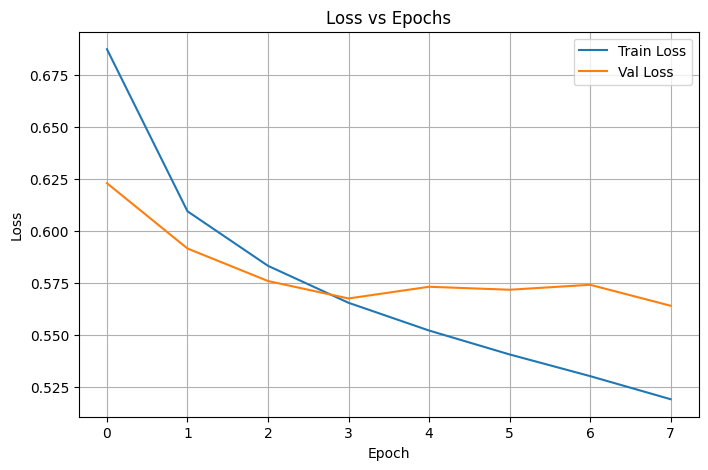

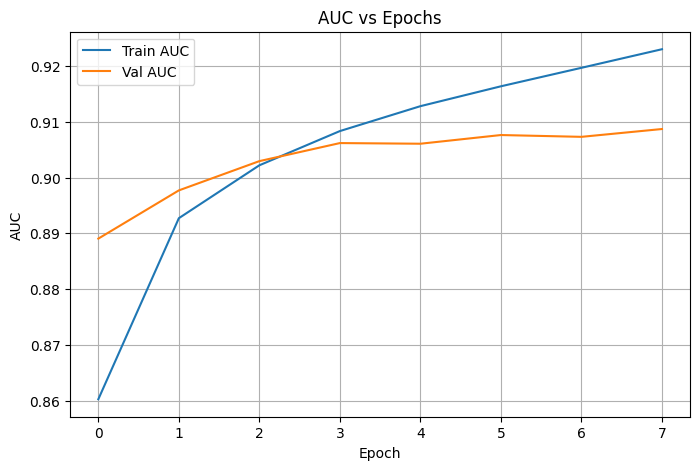

In [34]:
import matplotlib.pyplot as plt

# Loss plot
plt.figure(figsize=(8,5))
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.legend()
plt.grid(True)
plt.show()

# AUC plot
plt.figure(figsize=(8,5))
plt.plot(history["train_auc"], label="Train AUC")
plt.plot(history["val_auc"], label="Val AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.title("AUC vs Epochs")
plt.legend()
plt.grid(True)
plt.show()


## MOE 2

In [15]:
import math, numpy as np, torch, torch.nn as nn
from transformers import SwinModel

class SEBlock(nn.Module):
    def __init__(self, c, r=16):
        super().__init__()
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc   = nn.Sequential(
            nn.Linear(c, max(c//r, 4)), nn.ReLU(inplace=True),
            nn.Linear(max(c//r, 4), c), nn.Sigmoid()
        )
    def forward(self, x):
        b, c, _, _ = x.size()
        w = self.pool(x).view(b, c)
        w = self.fc(w).view(b, c, 1, 1)
        return x * w

class ResidualBlock(nn.Module):
    def __init__(self, in_ch, out_ch, stride=1, use_se=True, p_drop=0.1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, 3, stride=stride, padding=1, bias=False)
        self.bn1   = nn.BatchNorm2d(out_ch)
        self.act   = nn.GELU()
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1, bias=False)
        self.bn2   = nn.BatchNorm2d(out_ch)
        self.se    = SEBlock(out_ch) if use_se else nn.Identity()
        self.drop  = nn.Dropout2d(p_drop) if p_drop>0 else nn.Identity()

        self.proj  = (
            nn.Identity() if (in_ch==out_ch and stride==1)
            else nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 1, stride=stride, bias=False),
                nn.BatchNorm2d(out_ch)
            )
        )

    def forward(self, x):
        shortcut = self.proj(x)
        y = self.act(self.bn1(self.conv1(x)))
        y = self.bn2(self.conv2(y))
        y = self.se(y)
        y = self.drop(y)
        return self.act(y + shortcut)

class SwinResCNNHybrid(nn.Module):
    def __init__(self, num_labels=14,
                 backbone="microsoft/swin-tiny-patch4-window7-224",
                 head_channels=(512, 384, 256),
                 dropout_fc=0.2):
        super().__init__()
        self.swin = SwinModel.from_pretrained(backbone)
        c_in = self.swin.config.hidden_size  # genelde 768

        c1, c2, c3 = head_channels
        self.block1 = ResidualBlock(c_in, c1, stride=1, use_se=True,  p_drop=0.10)
        self.block2 = ResidualBlock(c1,  c2, stride=1, use_se=True,  p_drop=0.10)
        self.block3 = ResidualBlock(c2,  c3, stride=1, use_se=False, p_drop=0.05)

        self.pool = nn.AdaptiveAvgPool2d((1,1))
        self.dropout = nn.Dropout(dropout_fc)
        self.cls = nn.Linear(c3, num_labels)

    def forward(self, x):
        out = self.swin(x).last_hidden_state  # [B, N, c_in]
        B, N, C = out.shape
        H = int(round(math.sqrt(N)))
        if H*H != N:  # kare değilse
            H = int(np.floor(np.sqrt(N)))
            out = out[:, :H*H, :]
        feat = out.transpose(1,2).reshape(B, C, H, H)  # [B, C, H, H]

        feat = self.block1(feat)
        feat = self.block2(feat)
        feat = self.block3(feat)

        z = self.pool(feat).flatten(1)
        z = self.dropout(z)
        logits = self.cls(z)
        return logits


In [16]:
model = SwinResCNNHybrid(num_labels=len(TARGET_LABELS)).to(DEVICE)

# loss/optim/scheduler aynı kalabilir:
pos_weight = torch.tensor(
    [len(train_df) / (train_df[c].sum() + 1e-6) for c in TARGET_LABELS],
    dtype=torch.float32, device=DEVICE
)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.2, patience=2, verbose=True
)


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

In [18]:
# --- Config (hızlı baseline) ---
BATCH_SIZE = 64       # OOM olursa 32 yap
EPOCHS     = 8
LR         = 1e-4
USE_AMP    = torch.cuda.is_available()  # mixed precision

# Dataloader’lar zaten var: train_ld, val_ld
# (Eğer yoksa önceki CXRDataset + get_transforms + DataLoader bloklarını çalıştır)

# --- Yeni model ---
model = SwinResCNNHybrid(num_labels=len(TARGET_LABELS)).to(DEVICE)

if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

# --- Class imbalance için pos_weight ---
pos_weight = torch.tensor(
    [len(train_df) / (train_df[c].sum() + 1e-6) for c in TARGET_LABELS],
    dtype=torch.float32, device=DEVICE
)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.2, patience=2, verbose=True
)

scaler = torch.cuda.amp.GradScaler(enabled=USE_AMP)


/tmp/ipykernel_36/980311179.py:28: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=USE_AMP)


In [ ]:
from sklearn.metrics import roc_auc_score
import numpy as np

def evaluate_epoch(model, loader, criterion):
    model.eval()
    loss_sum, preds_list, labels_list = 0.0, [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            with torch.cuda.amp.autocast(enabled=USE_AMP):
                logits = model(imgs)
                loss = criterion(logits, labels)
            loss_sum += loss.item() * imgs.size(0)
            preds_list.append(torch.sigmoid(logits).cpu())
            labels_list.append(labels.cpu())
    avg_loss = loss_sum / len(loader.dataset)
    preds  = torch.cat(preds_list).numpy()
    labels = torch.cat(labels_list).numpy()
    macro_auc = roc_auc_score(labels, preds, average="macro")
    per_class = {}
    for i, name in enumerate(TARGET_LABELS):
        # Eğer foldda o sınıf tamamen 0/1 ise ROC hesaplanamaz; atla
        if len(np.unique(labels[:, i])) > 1:
            per_class[name] = roc_auc_score(labels[:, i], preds[:, i])
    return avg_loss, macro_auc, per_class

history = {"train_loss":[], "val_loss":[], "train_auc":[], "val_auc":[], "per_class_auc":[]}
best_auc = 0.0

for epoch in range(1, EPOCHS+1):
    # --- TRAIN ---
    model.train()
    tr_loss, tr_preds, tr_labels = 0.0, [], []
    for imgs, labels in tqdm(train_ld, desc=f"Epoch {epoch}/{EPOCHS} [train]"):
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        optimizer.zero_grad(set_to_none=True)
        with torch.cuda.amp.autocast(enabled=USE_AMP):
            logits = model(imgs)
            loss = criterion(logits, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        tr_loss += loss.item() * imgs.size(0)
        tr_preds.append(torch.sigmoid(logits).detach().cpu())
        tr_labels.append(labels.detach().cpu())
    tr_loss /= len(train_ld.dataset)
    tr_preds = torch.cat(tr_preds).numpy()
    tr_labels = torch.cat(tr_labels).numpy()
    tr_auc = roc_auc_score(tr_labels, tr_preds, average="macro")

    # --- VAL ---
    val_loss, val_auc, per_class = evaluate_epoch(model, val_ld, criterion)

    print(f"\nEpoch {epoch}/{EPOCHS}")
    print(f"Train Loss {tr_loss:.4f} | Train AUC {tr_auc:.4f}")
    print(f"Val   Loss {val_loss:.4f} | Val   AUC {val_auc:.4f}")
    print("Per-class AUCs:")
    for k in sorted(per_class.keys()):
        print(f"  {k}: {per_class[k]:.3f}")

    # save best
    if val_auc > best_auc:
        best_auc = val_auc
        save_name = "best_rescnn.pth"
        if isinstance(model, nn.DataParallel):
            torch.save(model.module.state_dict(), save_name)
        else:
            torch.save(model.state_dict(), save_name)
        print(f"✅ New best saved: {save_name} (Val AUC={best_auc:.4f})")

    scheduler.step(val_auc)

    # history
    history["train_loss"].append(tr_loss)
    history["val_loss"].append(val_loss)
    history["train_auc"].append(tr_auc)
    history["val_auc"].append(val_auc)
    history["per_class_auc"].append(per_class)


Epoch 1/8 [train]:   0%|          | 0/1330 [00:00<?, ?it/s]

/tmp/ipykernel_36/636600393.py:37: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):
/tmp/ipykernel_36/636600393.py:10: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):



Epoch 1/8
Train Loss 0.7522 | Train AUC 0.8698
Val   Loss 0.6995 | Val   AUC 0.8924
Per-class AUCs:
  Atelectasis: 0.896
  Cardiomegaly: 0.927
  Consolidation: 0.923
  Edema: 0.919
  Enlarged Cardiomediastinum: 0.967
  Fracture: 0.904
  Lung Lesion: 0.790
  Lung Opacity: 0.893
  No Finding: 0.895
  Pleural Effusion: 0.900
  Pleural Other: 0.840
  Pneumonia: 0.861
  Pneumothorax: 0.832
  Support Devices: 0.948
✅ New best saved: best_rescnn.pth (Val AUC=0.8924)


Epoch 2/8 [train]:   0%|          | 0/1330 [00:00<?, ?it/s]

/tmp/ipykernel_36/636600393.py:37: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):


In [ ]:
import matplotlib.pyplot as plt

# Loss curve
plt.figure(figsize=(8,5))
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"],   label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Loss vs Epochs")
plt.grid(True); plt.legend(); plt.show()

# AUC curve
plt.figure(figsize=(8,5))
plt.plot(history["train_auc"], label="Train AUC")
plt.plot(history["val_auc"],   label="Val AUC")
plt.xlabel("Epoch"); plt.ylabel("AUC"); plt.title("AUC vs Epochs")
plt.grid(True); plt.legend(); plt.show()

# Son epoch per-class AUC bar (hesaplanabilen sınıflar)
last_pc = history["per_class_auc"][-1]
names = list(last_pc.keys())
vals  = [last_pc[k] for k in names]
order = np.argsort(vals)[::-1]
plt.figure(figsize=(10,5))
plt.bar([names[i] for i in order], [vals[i] for i in order])
plt.xticks(rotation=60, ha='right')
plt.ylim(0.5, 1.0)
plt.title("Per-class AUC (last epoch)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
# en iyi modeli yükle
final_model = SwinResCNNHybrid(num_labels=len(TARGET_LABELS)).to(DEVICE)
state = torch.load("best_rescnn.pth", map_location=DEVICE)
final_model.load_state_dict(state)
final_model.eval()

# test dataset
sample_path = os.path.join(DATA_DIR, "sample_submission1.csv")  # yarışma dosya adın buysa bunu kullan
sample_sub  = pd.read_csv(sample_path)

test_ds = CXRDataset(
    sample_sub, TEST_DIR, TARGET_LABELS,
    transforms=get_transforms(train=False), is_test=True
)
test_ld = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=4, pin_memory=True)

# inference
all_probs = []
with torch.no_grad():
    for imgs in tqdm(test_ld, desc="Final Inference (ResCNN)"):
        imgs = imgs.to(DEVICE)
        logits = final_model(imgs)
        probs = torch.sigmoid(logits).cpu().numpy()
        all_probs.append(probs)
all_probs = np.vstack(all_probs)

# submission
submission = sample_sub.copy()
submission[TARGET_LABELS] = all_probs
sub_name = "submission_rescnn.csv"
submission.to_csv(sub_name, index=False)
print(f"✅ Submission saved: {sub_name}")

# indirilebilir linkler
from IPython.display import FileLink, display
display(FileLink(sub_name))
display(FileLink("best_rescnn.pth"))


In [ ]:
import os, math, numpy as np, torch, torch.nn as nn
from tqdm import tqdm
from transformers import SwinModel
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# --- Model tanımları ---
class SEBlock(nn.Module):
    def __init__(self, c, r=16):
        super().__init__()
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc   = nn.Sequential(
            nn.Linear(c, max(c//r, 4)), nn.ReLU(inplace=True),
            nn.Linear(max(c//r, 4), c), nn.Sigmoid()
        )
    def forward(self, x):
        b, c, _, _ = x.size()
        w = self.pool(x).view(b, c)
        w = self.fc(w).view(b, c, 1, 1)
        return x * w

class ResidualBlock(nn.Module):
    def __init__(self, in_ch, out_ch, stride=1, use_se=True, p_drop=0.1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_ch, out_ch, 3, stride=stride, padding=1, bias=False)
        self.bn1   = nn.BatchNorm2d(out_ch)
        self.act   = nn.GELU()
        self.conv2 = nn.Conv2d(out_ch, out_ch, 3, padding=1, bias=False)
        self.bn2   = nn.BatchNorm2d(out_ch)
        self.se    = SEBlock(out_ch) if use_se else nn.Identity()
        self.drop  = nn.Dropout2d(p_drop) if p_drop>0 else nn.Identity()

        self.proj  = (
            nn.Identity() if (in_ch==out_ch and stride==1)
            else nn.Sequential(
                nn.Conv2d(in_ch, out_ch, 1, stride=stride, bias=False),
                nn.BatchNorm2d(out_ch)
            )
        )

    def forward(self, x):
        shortcut = self.proj(x)
        y = self.act(self.bn1(self.conv1(x)))
        y = self.bn2(self.conv2(y))
        y = self.se(y)
        y = self.drop(y)
        return self.act(y + shortcut)

class SwinResCNNHybrid(nn.Module):
    def __init__(self, num_labels=14,
                 backbone="microsoft/swin-tiny-patch4-window7-224",
                 head_channels=(512, 384, 256),
                 dropout_fc=0.2):
        super().__init__()
        self.swin = SwinModel.from_pretrained(backbone)
        c_in = self.swin.config.hidden_size

        c1, c2, c3 = head_channels
        self.block1 = ResidualBlock(c_in, c1, stride=1, use_se=True,  p_drop=0.10)
        self.block2 = ResidualBlock(c1,  c2, stride=1, use_se=True,  p_drop=0.10)
        self.block3 = ResidualBlock(c2,  c3, stride=1, use_se=False, p_drop=0.05)

        self.pool = nn.AdaptiveAvgPool2d((1,1))
        self.dropout = nn.Dropout(dropout_fc)
        self.cls = nn.Linear(c3, num_labels)

    def forward(self, x):
        out = self.swin(x).last_hidden_state  # [B, N, C]
        B, N, C = out.shape
        H = int(round(math.sqrt(N)))
        if H*H != N:  
            H = int(np.floor(np.sqrt(N)))
            out = out[:, :H*H, :]
        feat = out.transpose(1,2).reshape(B, C, H, H)

        feat = self.block1(feat)
        feat = self.block2(feat)
        feat = self.block3(feat)

        z = self.pool(feat).flatten(1)
        z = self.dropout(z)
        logits = self.cls(z)
        return logits

# --- Config ---
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
BATCH_SIZE = 16       # küçük batch
EPOCHS     = 10       # biraz artır
LR         = 1e-4
ACCUM_STEPS = 4       # 16*4 = 64 effective batch
USE_AMP    = torch.cuda.is_available()

# --- Model / loss / optim ---
model = SwinResCNNHybrid(num_labels=len(TARGET_LABELS)).to(DEVICE)
if torch.cuda.device_count() > 1:
    model = nn.DataParallel(model)

pos_weight = torch.tensor(
    [len(train_df) / (train_df[c].sum() + 1e-6) for c in TARGET_LABELS],
    dtype=torch.float32, device=DEVICE
)

criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='max', factor=0.2, patience=2, verbose=True
)
scaler = torch.cuda.amp.GradScaler(enabled=USE_AMP)

# --- Evaluation helper ---
def evaluate_epoch(model, loader, criterion):
    model.eval()
    loss_sum, preds_list, labels_list = 0.0, [], []
    with torch.no_grad():
        for imgs, labels in loader:
            imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
            with torch.cuda.amp.autocast(enabled=USE_AMP):
                logits = model(imgs)
                loss = criterion(logits, labels)
            loss_sum += loss.item() * imgs.size(0)
            preds_list.append(torch.sigmoid(logits).cpu())
            labels_list.append(labels.cpu())
    avg_loss = loss_sum / len(loader.dataset)
    preds  = torch.cat(preds_list).numpy()
    labels = torch.cat(labels_list).numpy()
    macro_auc = roc_auc_score(labels, preds, average="macro")
    per_class = {}
    for i, name in enumerate(TARGET_LABELS):
        if len(np.unique(labels[:, i])) > 1:
            per_class[name] = roc_auc_score(labels[:, i], preds[:, i])
    return avg_loss, macro_auc, per_class

# --- Training loop with accumulation ---
history = {"train_loss":[], "val_loss":[], "train_auc":[], "val_auc":[], "per_class_auc":[]}
best_auc = 0.0

for epoch in range(1, EPOCHS+1):
    model.train()
    tr_loss, tr_preds, tr_labels = 0.0, [], []
    optimizer.zero_grad(set_to_none=True)

    for step, (imgs, labels) in enumerate(tqdm(train_ld, desc=f"Epoch {epoch}/{EPOCHS} [train]")):
        imgs, labels = imgs.to(DEVICE), labels.to(DEVICE)
        with torch.cuda.amp.autocast(enabled=USE_AMP):
            logits = model(imgs)
            loss = criterion(logits, labels) / ACCUM_STEPS  # böl!
        scaler.scale(loss).backward()

        if (step+1) % ACCUM_STEPS == 0:
            scaler.step(optimizer)
            scaler.update()
            optimizer.zero_grad(set_to_none=True)

        tr_loss += loss.item() * ACCUM_STEPS * imgs.size(0)
        tr_preds.append(torch.sigmoid(logits).detach().cpu())
        tr_labels.append(labels.detach().cpu())

    tr_loss /= len(train_ld.dataset)
    tr_preds = torch.cat(tr_preds).numpy()
    tr_labels = torch.cat(tr_labels).numpy()
    tr_auc = roc_auc_score(tr_labels, tr_preds, average="macro")

    val_loss, val_auc, per_class = evaluate_epoch(model, val_ld, criterion)

    print(f"\nEpoch {epoch}/{EPOCHS}")
    print(f"Train Loss {tr_loss:.4f} | Train AUC {tr_auc:.4f}")
    print(f"Val   Loss {val_loss:.4f} | Val   AUC {val_auc:.4f}")
    for k in sorted(per_class.keys()):
        print(f"  {k}: {per_class[k]:.3f}")

    if val_auc > best_auc:
        best_auc = val_auc
        save_name = "best_rescnn.pth"
        if isinstance(model, nn.DataParallel):
            torch.save(model.module.state_dict(), save_name)
        else:
            torch.save(model.state_dict(), save_name)
        print(f"✅ New best saved: {save_name} (Val AUC={best_auc:.4f})")

    scheduler.step(val_auc)

    history["train_loss"].append(tr_loss)
    history["val_loss"].append(val_loss)
    history["train_auc"].append(tr_auc)
    history["val_auc"].append(val_auc)
    history["per_class_auc"].append(per_class)

# --- Plot ---
plt.figure(figsize=(8,5))
plt.plot(history["train_loss"], label="Train Loss")
plt.plot(history["val_loss"], label="Val Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Loss vs Epochs")
plt.grid(True); plt.legend(); plt.show()

plt.figure(figsize=(8,5))
plt.plot(history["train_auc"], label="Train AUC")
plt.plot(history["val_auc"], label="Val AUC")
plt.xlabel("Epoch"); plt.ylabel("AUC"); plt.title("AUC vs Epochs")
plt.grid(True); plt.legend(); plt.show()

last_pc = history["per_class_auc"][-1]
names = list(last_pc.keys())
vals  = [last_pc[k] for k in names]
order = np.argsort(vals)[::-1]
plt.figure(figsize=(10,5))
plt.bar([names[i] for i in order], [vals[i] for i in order])
plt.xticks(rotation=60, ha='right')
plt.ylim(0.5, 1.0)
plt.title("Per-class AUC (last epoch)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/113M [00:00<?, ?B/s]

/tmp/ipykernel_36/2891487551.py:108: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = torch.cuda.amp.GradScaler(enabled=USE_AMP)
Epoch 1/10 [train]:   0%|          | 0/2660 [00:00<?, ?it/s]/tmp/ipykernel_36/2891487551.py:144: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):
Epoch 1/10 [train]: 100%|██████████| 2660/2660 [27:20<00:00,  1.62it/s]
/tmp/ipykernel_36/2891487551.py:117: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):



Epoch 1/10
Train Loss 0.7649 | Train AUC 0.8653
Val   Loss 0.6741 | Val   AUC 0.8964
  Atelectasis: 0.901
  Cardiomegaly: 0.933
  Consolidation: 0.925
  Edema: 0.926
  Enlarged Cardiomediastinum: 0.970
  Fracture: 0.908
  Lung Lesion: 0.786
  Lung Opacity: 0.902
  No Finding: 0.900
  Pleural Effusion: 0.906
  Pleural Other: 0.845
  Pneumonia: 0.864
  Pneumothorax: 0.835
  Support Devices: 0.950
✅ New best saved: best_rescnn.pth (Val AUC=0.8964)


Epoch 2/10 [train]:   0%|          | 0/2660 [00:00<?, ?it/s]/tmp/ipykernel_36/2891487551.py:144: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(enabled=USE_AMP):
Epoch 2/10 [train]:   6%|▋         | 172/2660 [01:49<27:38,  1.50it/s]